In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\Bhaskar Konda\Desktop\3rd year\sem6\da\mini project\data\Rare_Event_Classification_Data.csv")

In [3]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
x61     0
Length: 63, dtype: int64

In [5]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,0.380519,0.360246,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,6.211598,14.174273,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-187.943440,-1817.595500,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,-3.672684,-1.928166,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,0.294846,0.143612,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,5.109543,3.230770,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,14.180588,11.148006,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


In [6]:
df.nunique()

time    18398
y           2
x1      14091
x2      15768
x3      16615
        ...  
x57      1112
x58     13025
x59     12225
x60     10800
x61         2
Length: 63, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [8]:
df = df.drop(df.columns[0], axis=1)

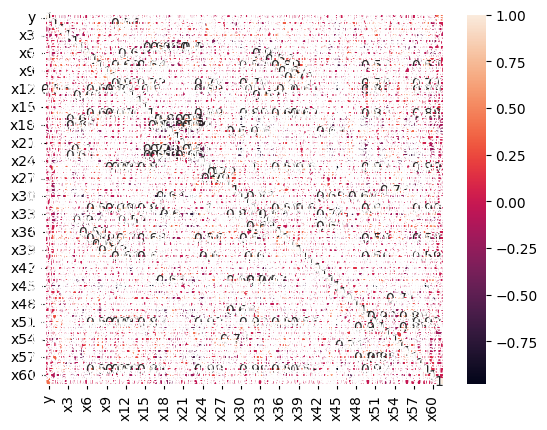

In [9]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

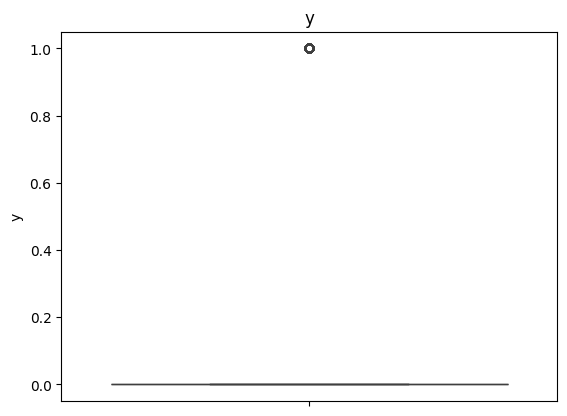

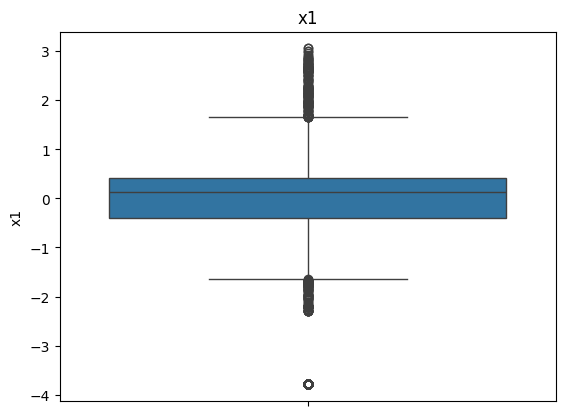

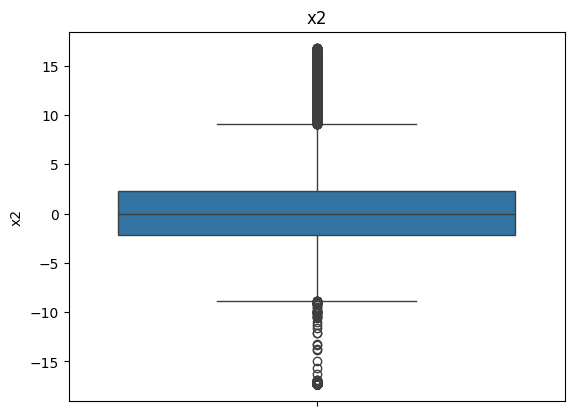

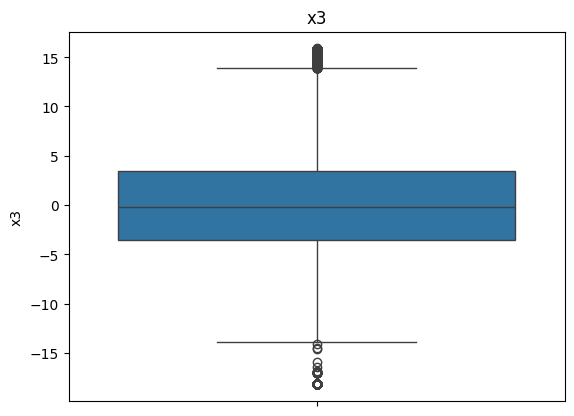

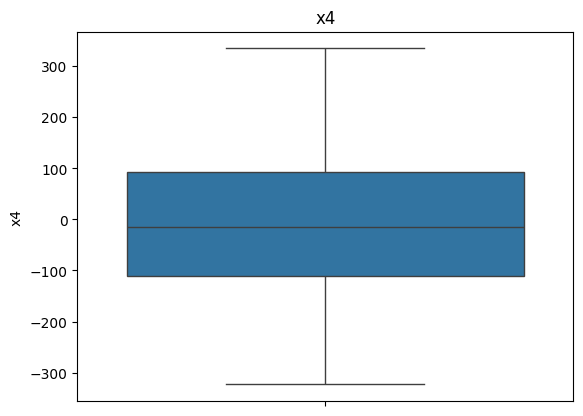

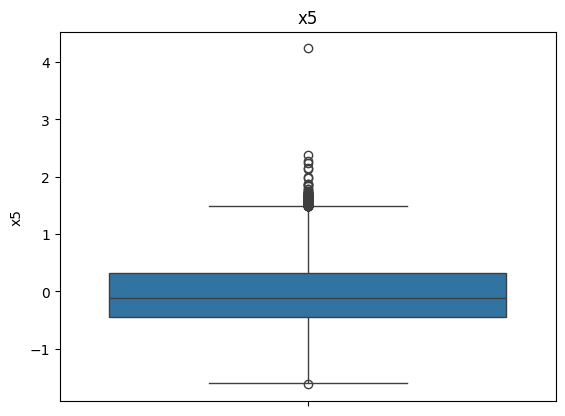

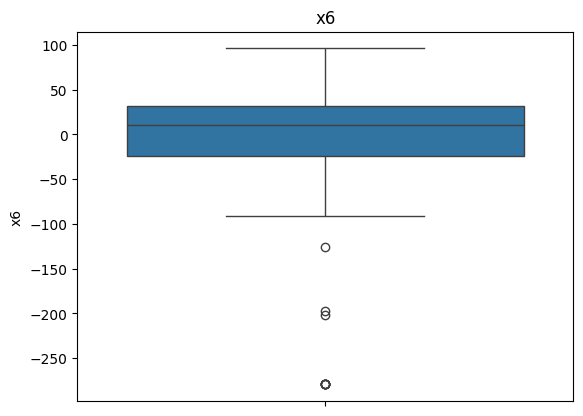

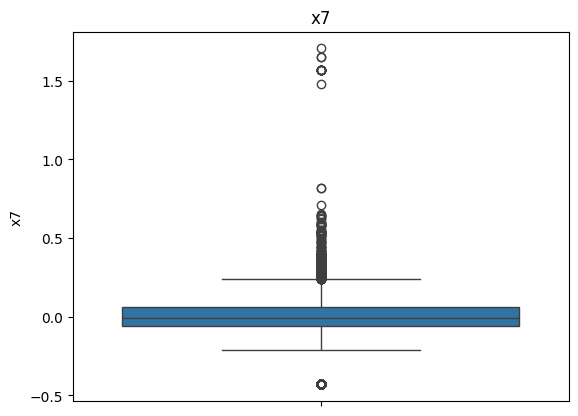

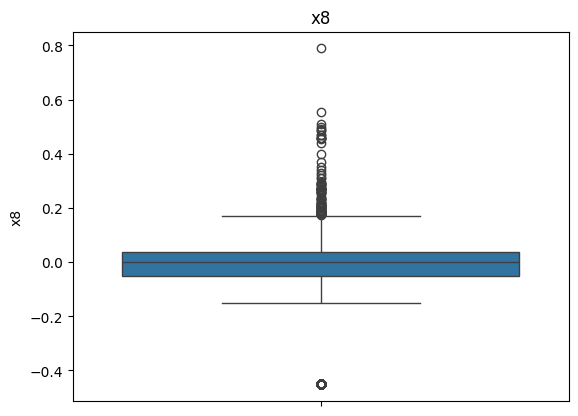

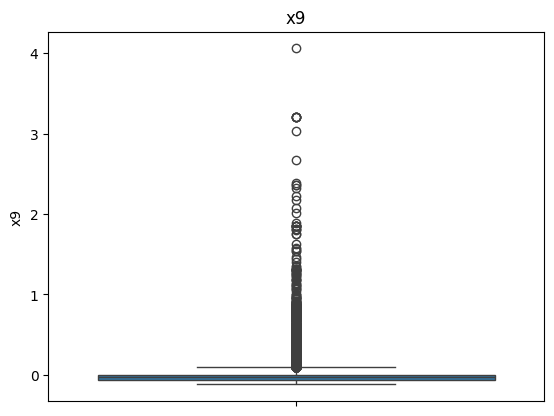

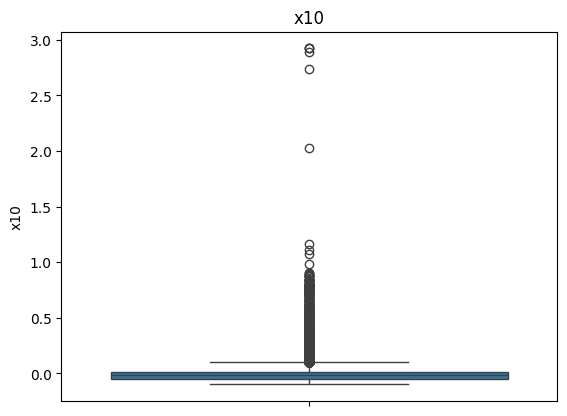

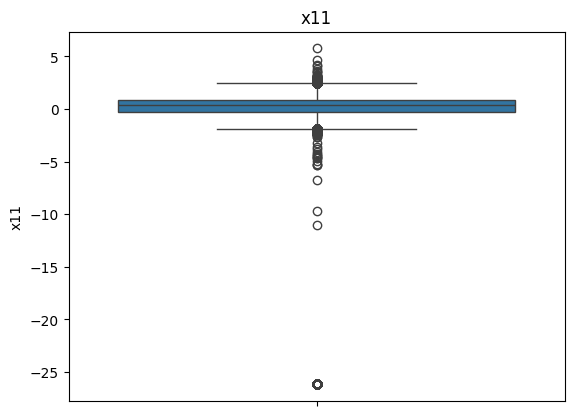

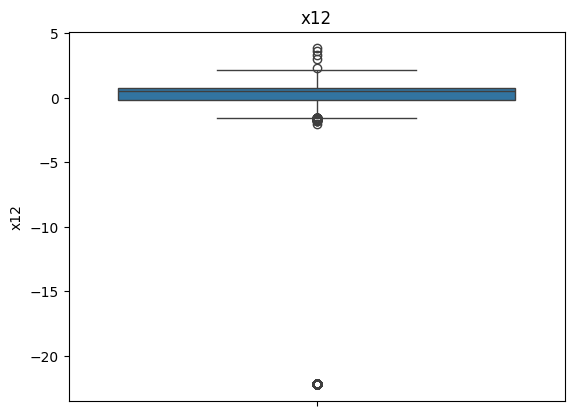

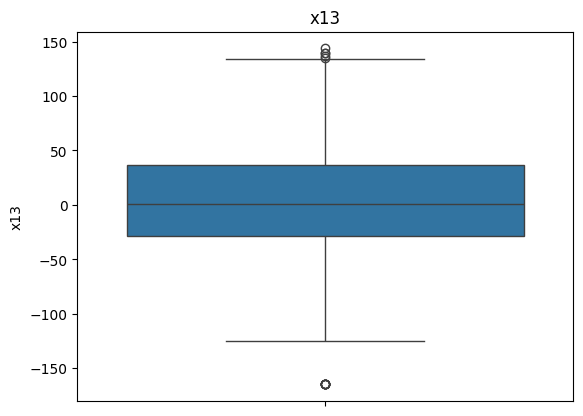

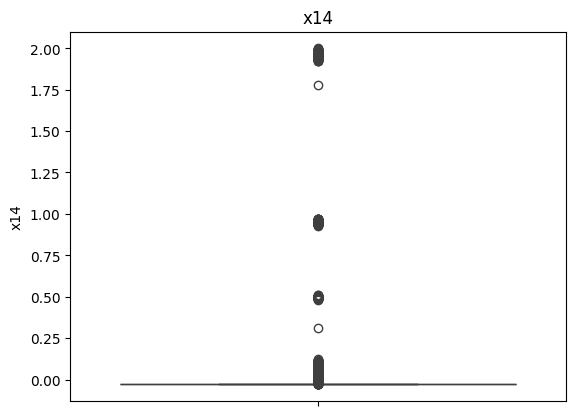

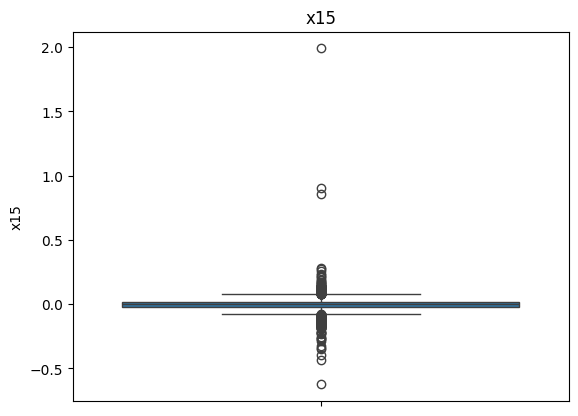

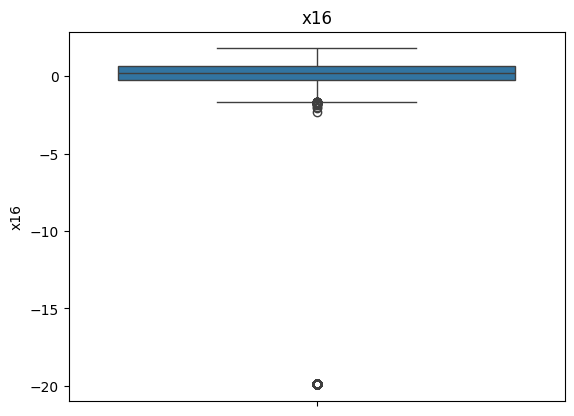

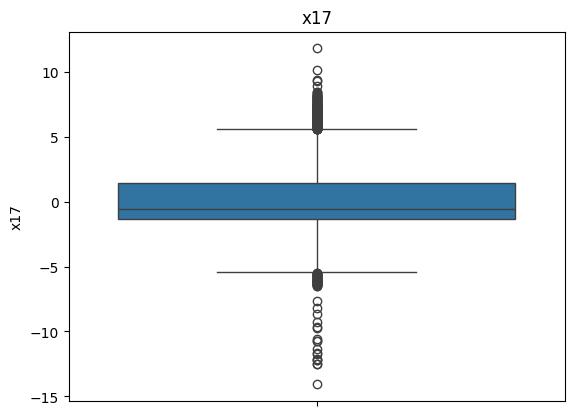

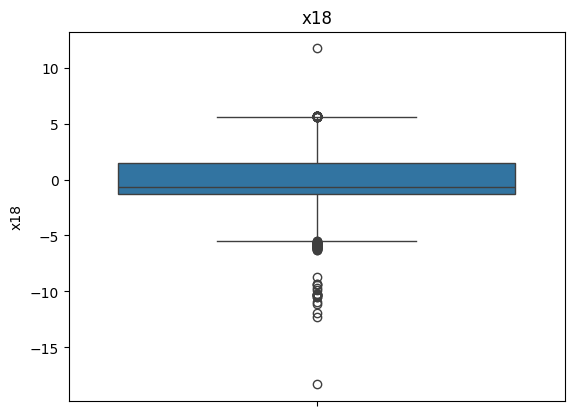

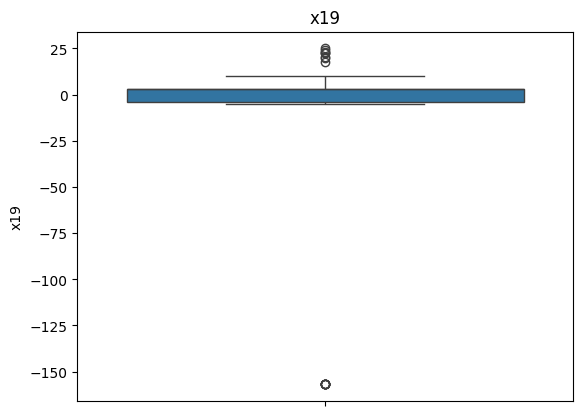

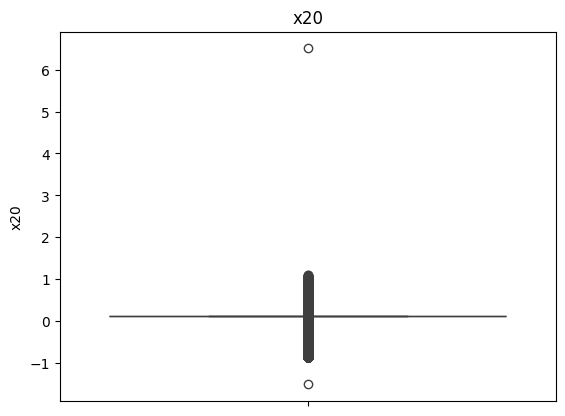

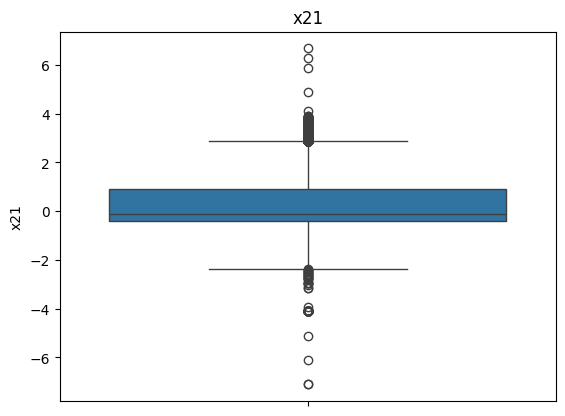

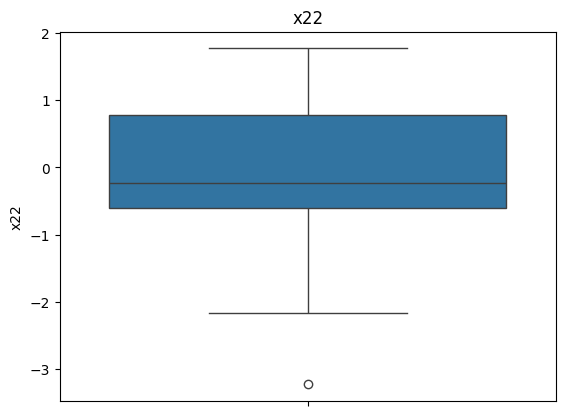

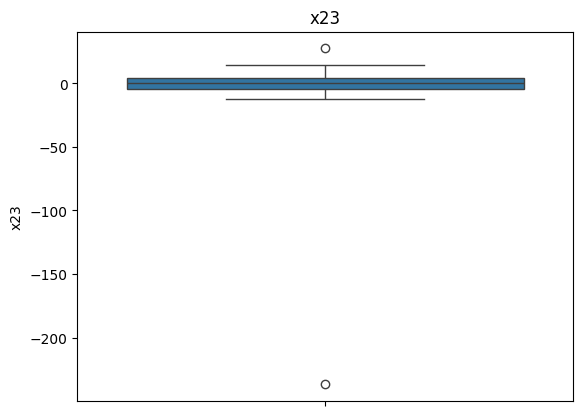

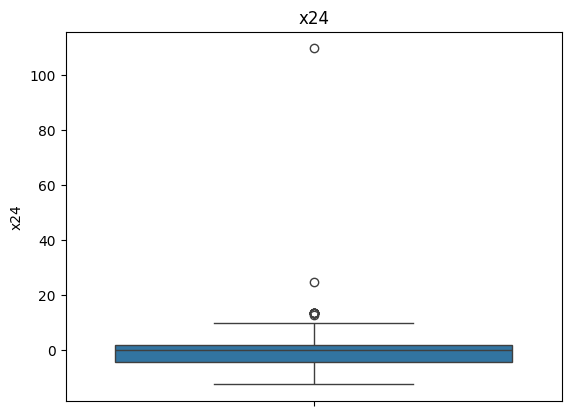

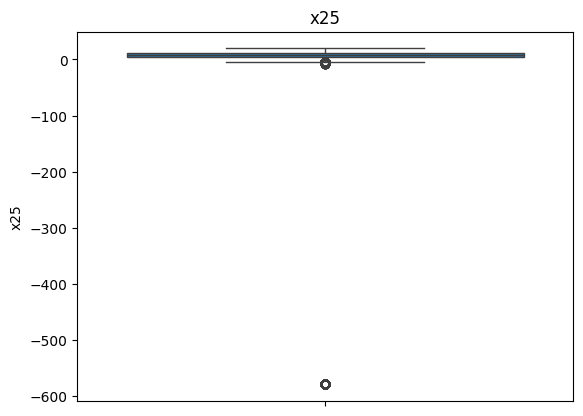

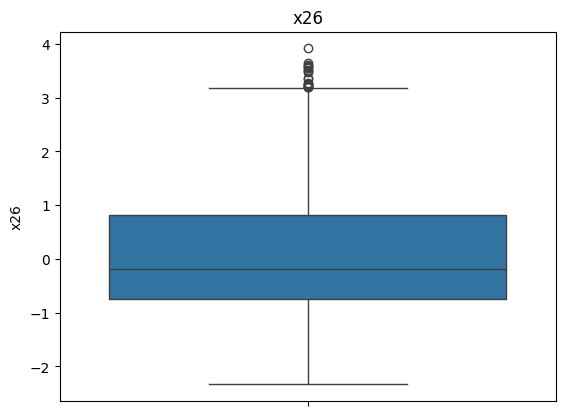

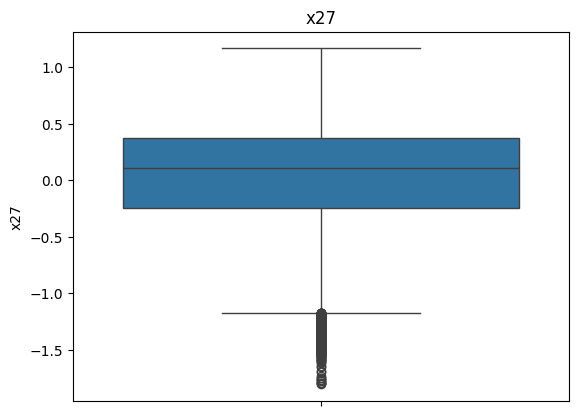

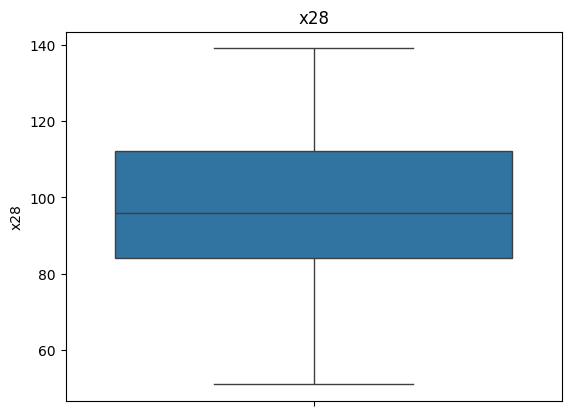

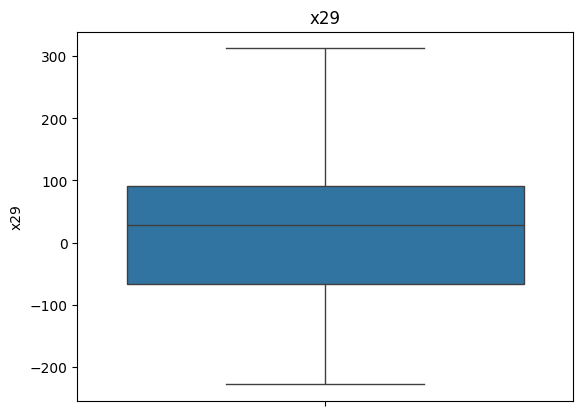

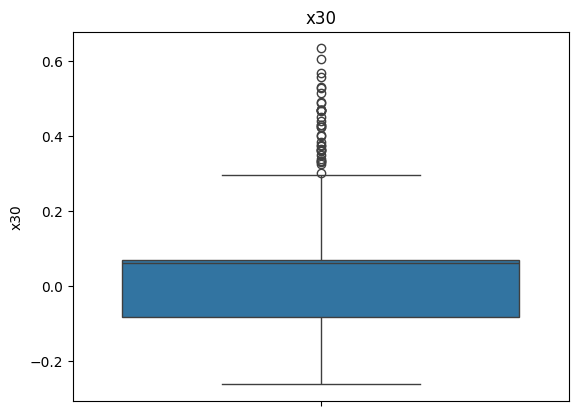

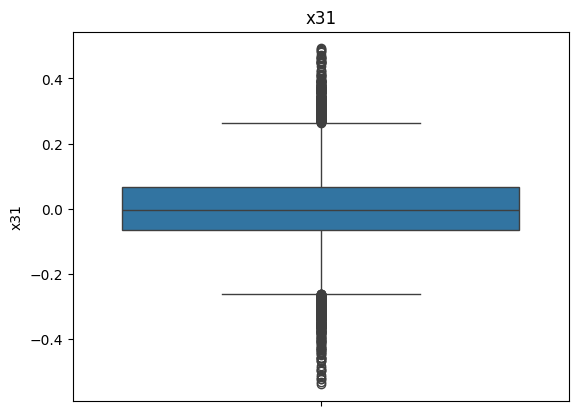

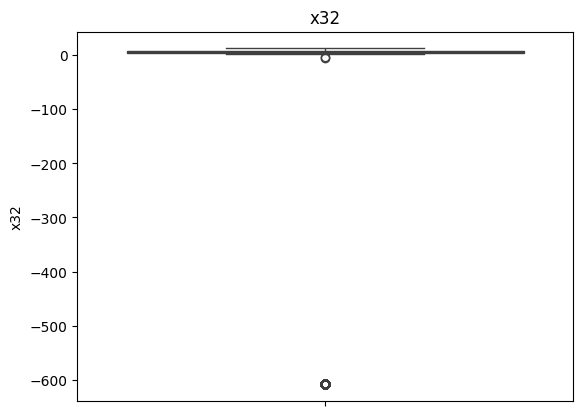

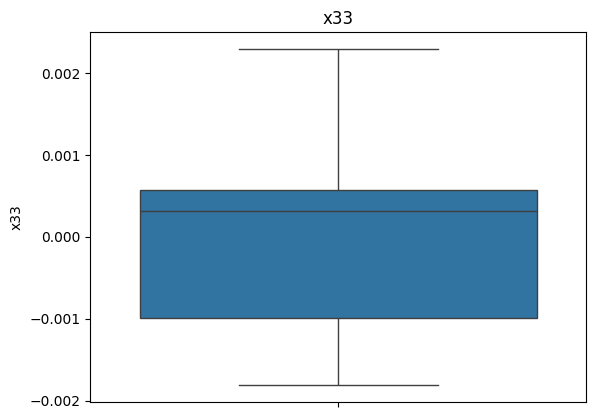

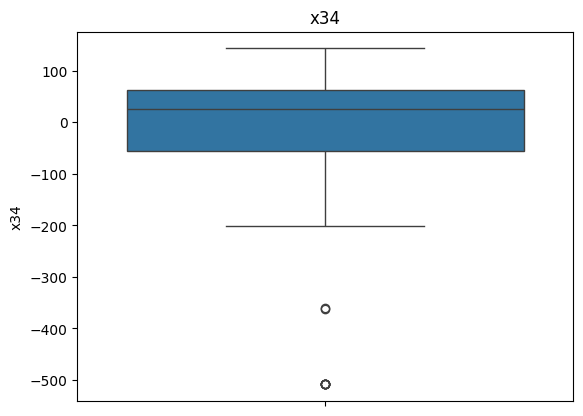

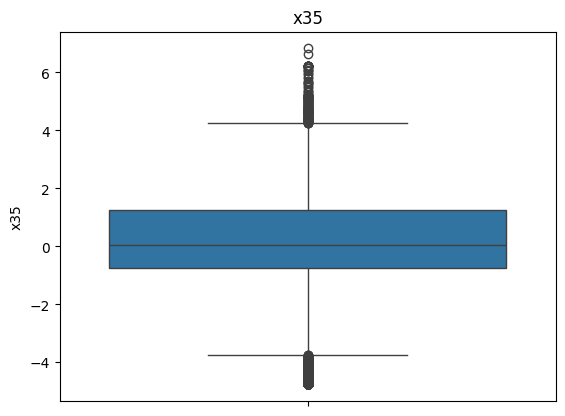

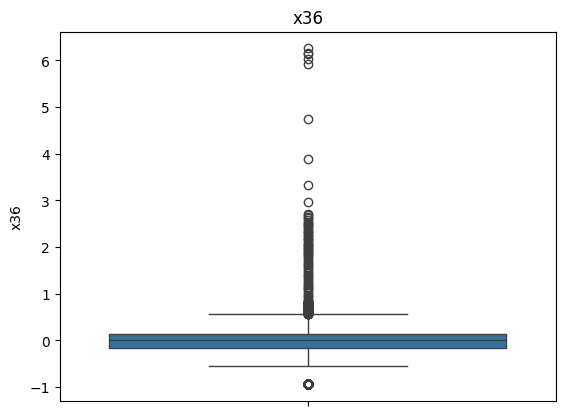

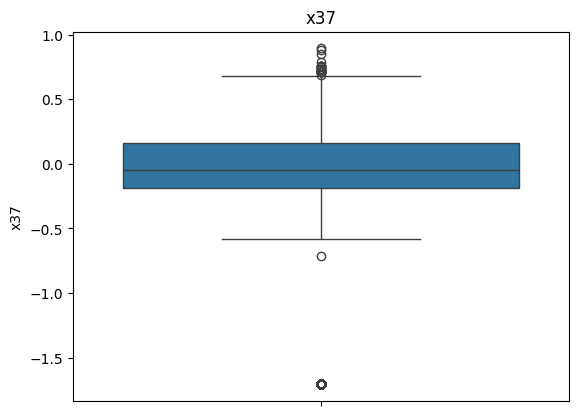

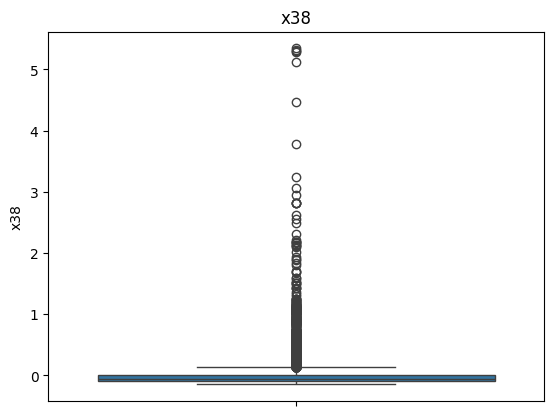

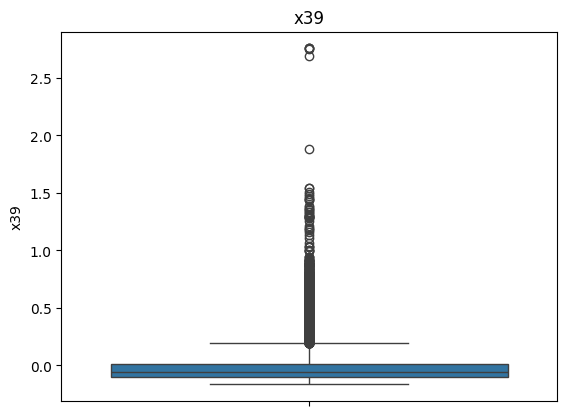

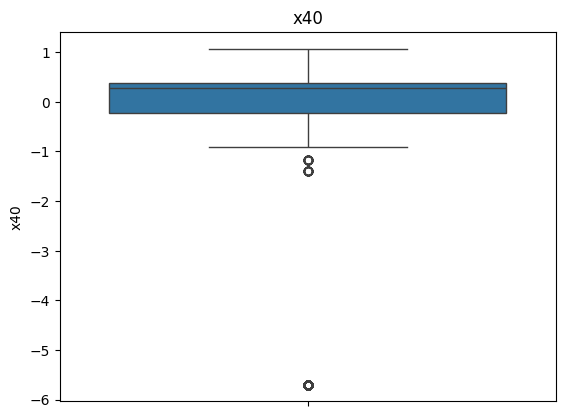

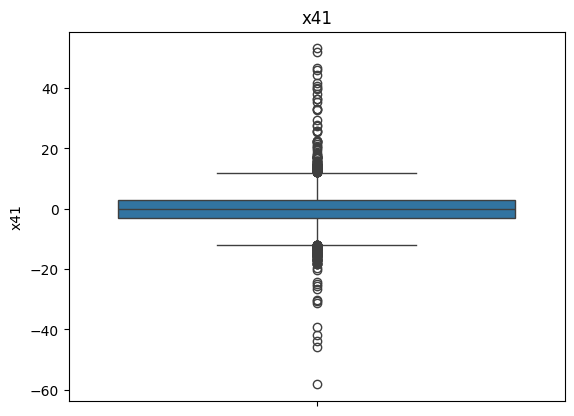

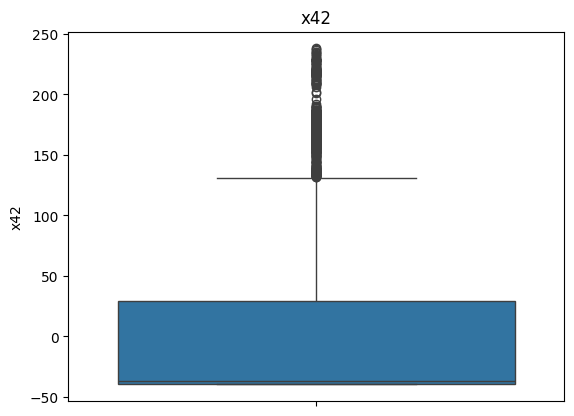

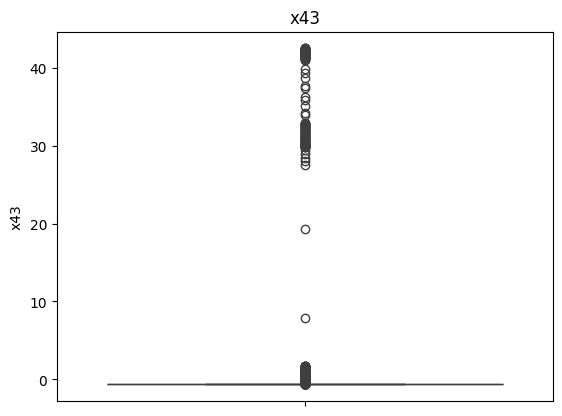

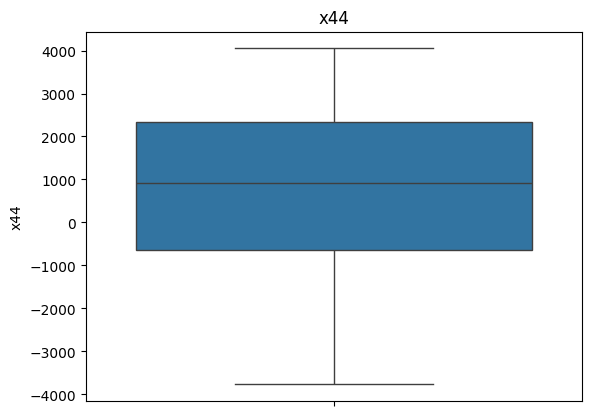

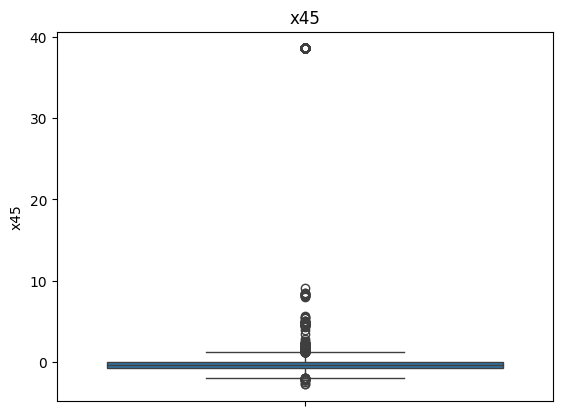

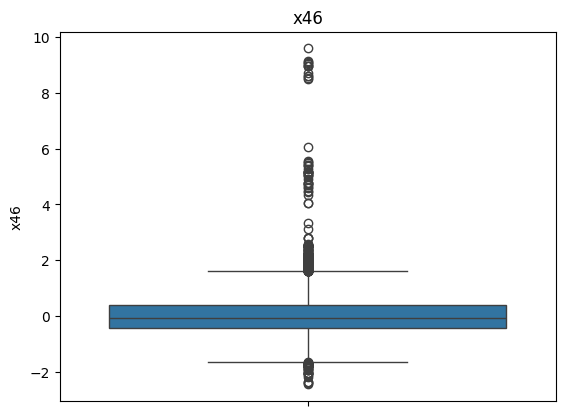

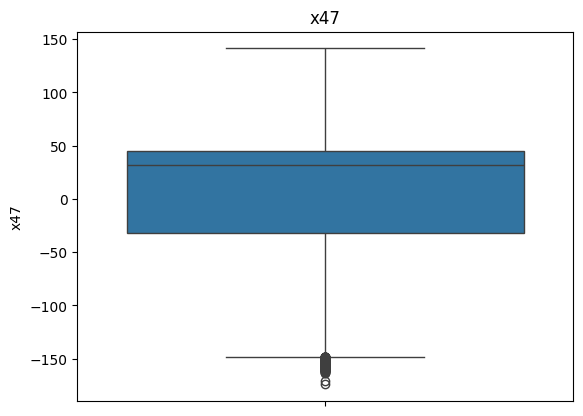

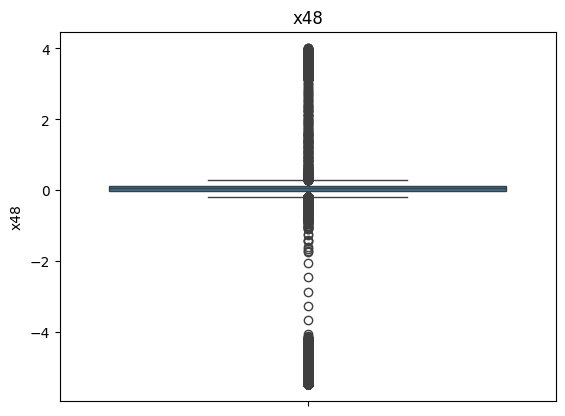

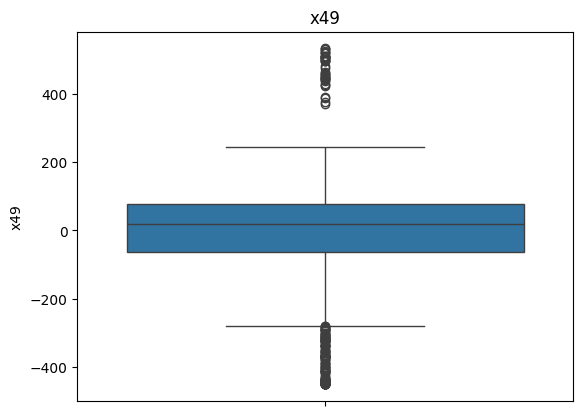

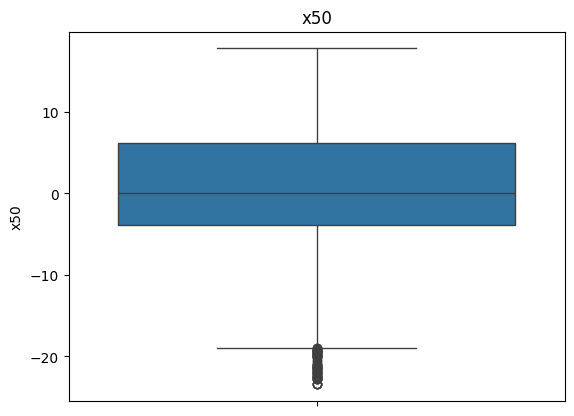

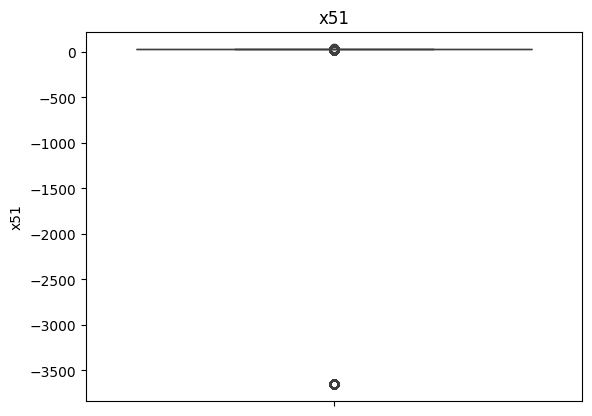

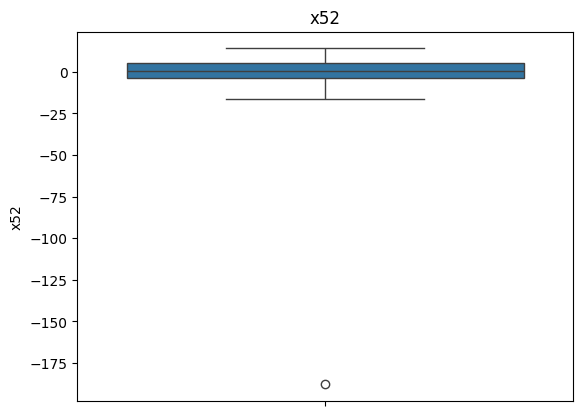

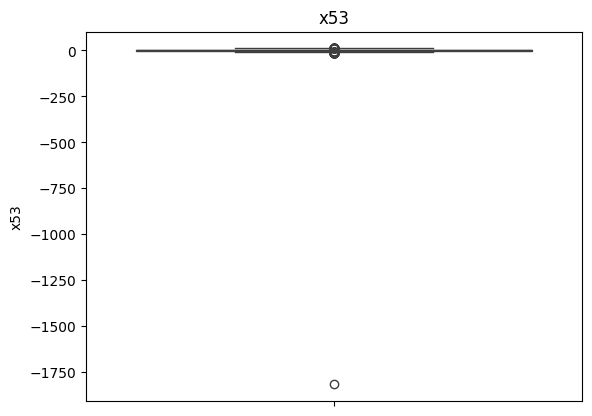

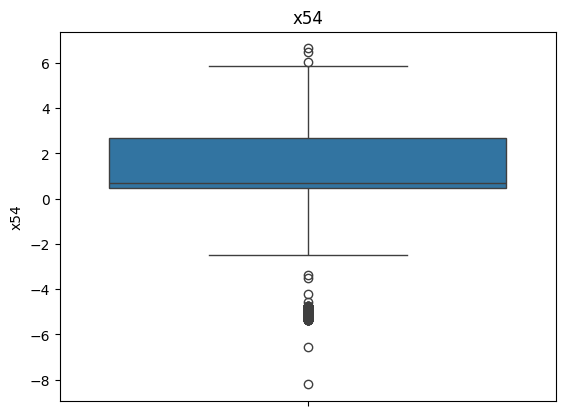

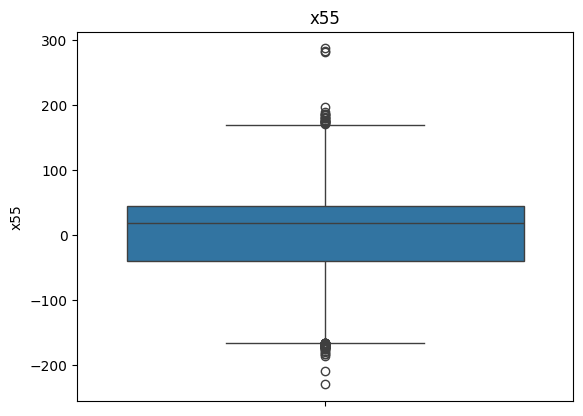

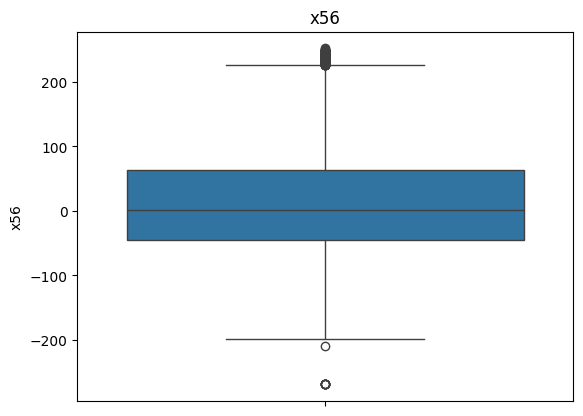

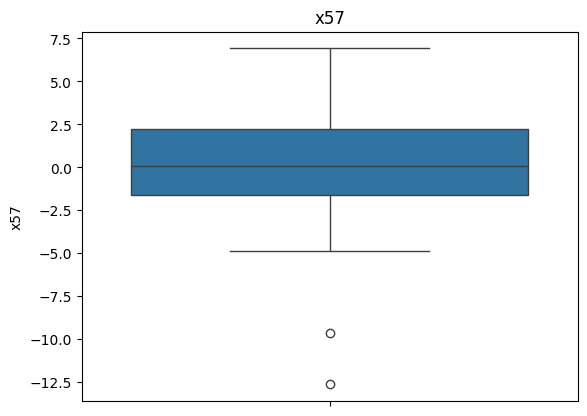

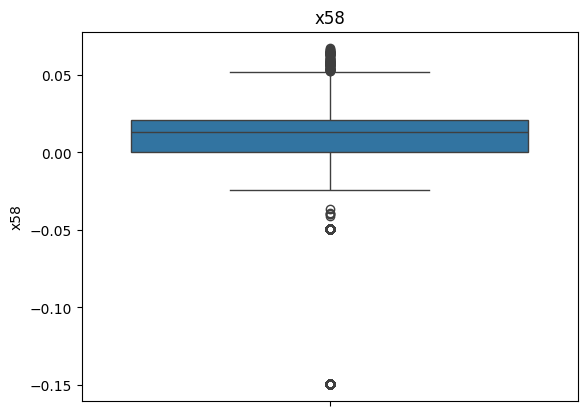

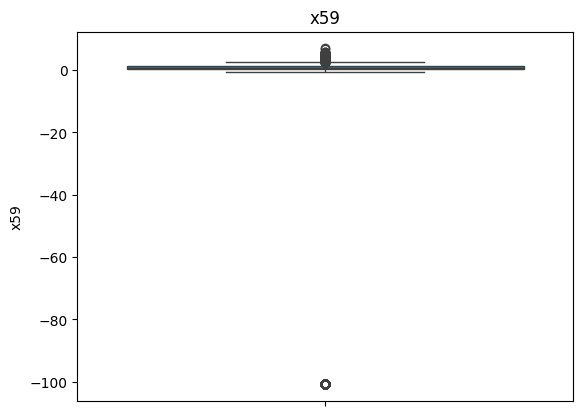

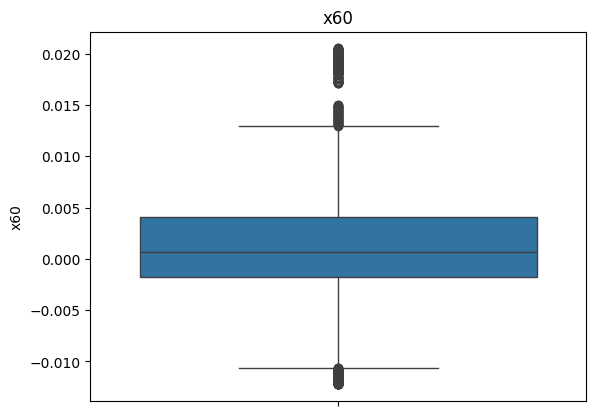

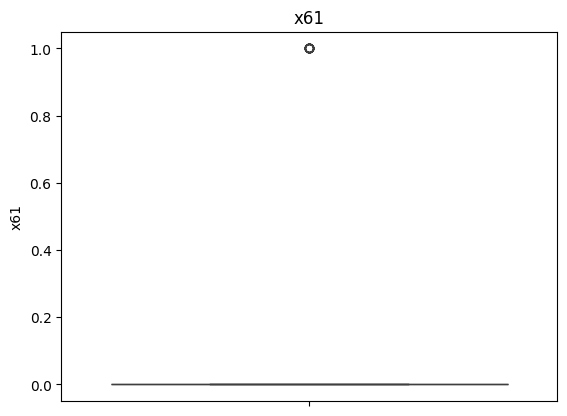

In [10]:
for i in df.columns:
    if type(df[i][0])!=str:
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

In [11]:
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where(column < lower_bound, lower_bound, np.where(column > upper_bound, upper_bound, column))

# Get all column names except the first one
columns_to_remove_outliers = df.columns[1:]

# Iterate over the columns and remove outliers
for col in columns_to_remove_outliers:
    df[col] = remove_outliers_iqr(df[col])



In [12]:
train=df[:12946]
test=df[12946:]

### BALANCING THE DATA

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming y is your target variable
# Assuming X is your feature matrix

# Extracting 'y' as the first column
y = train.iloc[:, 0]

# Extracting the rest of the columns as features
X = train.iloc[:, 1:]

# Convert 'y' to a binary target variable
# For example, if you want to convert all non-zero values to 1 and keep zeros as is
y_binary = (y != 0).astype(int)

# Convert y to a binary target variable (if not already binary)
# For example, if y has multiple classes, you might want to convert it to binary
# For this example, let's assume 1 is the minority class and 0 is the majority class
y_binary = (y == 1).astype(int)

# Balancing the classes
# Choose either RandomOverSampler or RandomUnderSampler based on your preference
# Oversampling the minority class
# oversampler = RandomOverSampler(random_state=42)
# X_balanced, y_balanced = oversampler.fit_resample(X, y_binary)

# Undersampling the majority class
undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X, y_binary)

# Now, X_balanced and y_balanced contain the balanced dataset



In [14]:
# Count occurrences of zeros and ones in y
counts = y_balanced.value_counts()

# Display counts
print("Counts of zeros and ones:")
print(counts)




Counts of zeros and ones:
y
0    84
1    84
Name: count, dtype: int64


### scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X_balanced)

# Now, X_scaled contains the scaled features


In [16]:
X_scaled

array([[-0.70745635,  0.26977854, -0.15718739, ...,  1.68174764,
         1.07486578,  0.        ],
       [ 0.04094075,  0.25928453,  0.13326068, ..., -0.84543174,
         0.88390042,  0.        ],
       [-0.03227413,  0.20302499, -0.05546105, ...,  0.06843464,
        -0.77910416,  0.        ],
       ...,
       [ 0.50444709, -1.22736209, -0.80768086, ..., -0.23634645,
        -1.9596382 ,  0.        ],
       [ 0.81013297, -1.2175196 , -0.88549897, ..., -0.26601008,
        -1.75532828,  0.        ],
       [ 1.16879971,  0.49454705, -0.79296142, ..., -0.90517239,
        -1.25122574,  0.        ]])

### spliting into test and training dataset

In [30]:
# Split the data into training and testing sets
X_train = X_scaled
X_test =  test.iloc[:,1:]
y_train = y_balanced
y_test =  test.iloc[:,0]
# X_train and y_train will be your training data
# X_test and y_test will be your testing data


In [29]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_binary:", y_balanced.shape)


Shape of X_scaled: (168, 61)
Shape of y_binary: (168,)


### Model building

Random Forest:


/home/venkatasai24/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.43011738811445344
Precision: 0.011468620579802484
Recall: 0.9
F1 Score: 0.022648631645171436


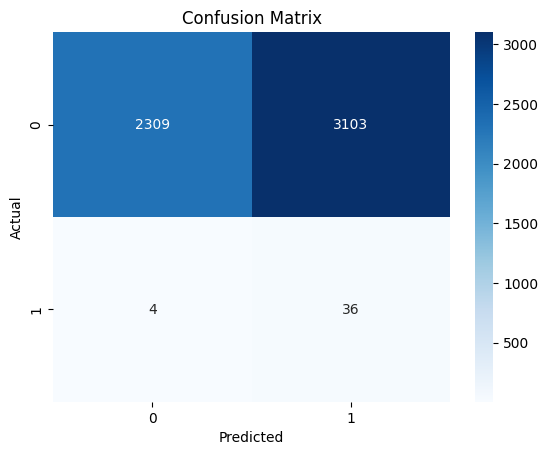

Support Vector Machine:
Accuracy: 0.007336757153338224
Precision: 0.007336757153338224
Recall: 1.0
F1 Score: 0.014566642388929352


/home/venkatasai24/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


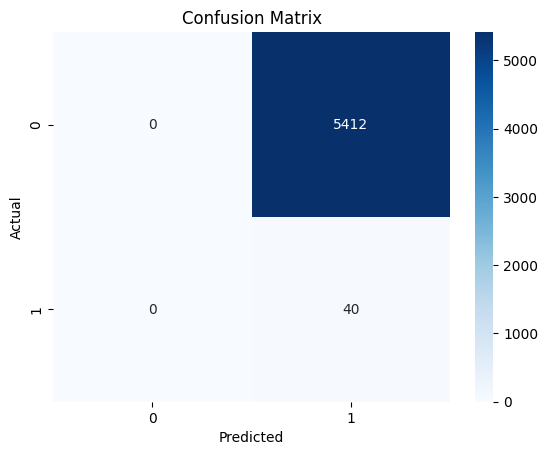

Gradient Boosting:
Accuracy: 0.43543653705062363
Precision: 0.01126126126126126
Recall: 0.875
F1 Score: 0.022236340533672173


/home/venkatasai24/.local/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


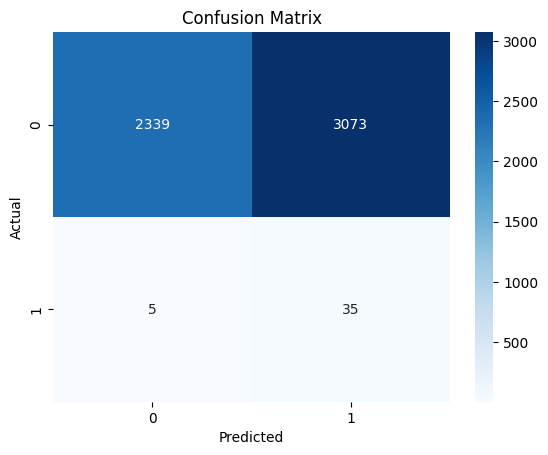

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate and print evaluation metrics
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Display evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



# Random Forest
print("Random Forest:")
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
evaluate_model(random_forest, X_test, y_test)

# Support Vector Machine
print("Support Vector Machine:")
svm = SVC()
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test)

# Gradient Boosting
print("Gradient Boosting:")
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
evaluate_model(gradient_boosting, X_test, y_test)
